In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = {
    1: [(-np.sqrt(3)/3, 1),
        (np.sqrt(3)/3, 1)],

    2: [(-np.sqrt(3)/np.sqrt(5), 5/9),
        (0, 8/9),
        (np.sqrt(3)/np.sqrt(5), 5/9)],

    3: [(-np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36),
        (-np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) - (2/7)*(np.sqrt(6/5))), (18 + np.sqrt(30))/36),
        (np.sqrt((3/7) + (2/7)*(np.sqrt(6/5))), (18 - np.sqrt(30))/36)],

    4: [(-(1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900),
        (-(1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        (0, 128/225),
        ((1/3)*np.sqrt(5 - 2*(np.sqrt(10/7))), (322 + 13*np.sqrt(70))/900),
        ((1/3)*np.sqrt(5 + 2*(np.sqrt(10/7))), (322 - 13*np.sqrt(70))/900)]
}

In [3]:
def func_F(a, b, t, f): #recebe o intervalo do elemento, fazendo F(x(t))
  # return f(t*(b - a)/2 + (b + a)/2) * (b - a)/2
  return f(t) * (b - a)/2


#bases de lagrange no intervalo de -1 a 1):
def shg(deriv, index, t, grau): # deriv = 1 -> base original, deriv = 2 -> derivada da base
  index +=1

  # Bases originais
  if deriv == 1:

    if grau == 1:
      if index == 1:
        return (1 - t)/2
      elif index == 2:
        return (1 + t)/2

    elif grau == 2:
      if index == 1:
        return t*(t - 1)/2
      elif index == 2:
        return -(t - 1)*(t + 1)
      elif index == 3:
        return t*(t + 1)/2

    elif grau == 3:
      if index == 1:
        return (t + (1/3))*(t - (1/3))*(t - 1)*(-9/16)
      elif index == 2:
        return (t + 1)*(t - (1/3))*(t - 1)*(27/16)
      elif index == 3:
        return (t + 1)*(t + (1/3))*(t - 1)*(-27/16)
      elif index == 4:
        return (t + 1)*(t + (1/3))*(t - (1/3))*(9/16)

    elif grau == 4:
      if index == 1:
        return (t + (1/2))*t*(t - (1/2))*(t - 1)*(2/3)
      elif index == 2:
        return (t + 1)*t*(t - (1/2))*(t - 1)*(-8/3)
      elif index == 3:
        return (t + 1)*(t + (1/2))*(t - (1/2))*(t - 1)*4
      elif index == 4:
        return (t + 1)*(t + (1/2))*t*(t - 1)*(-8/3)
      elif index == 5:
        return (t + 1)*(t + (1/2))*t*(t - (1/2))*(2/3)

  # Bases derivadas
  elif deriv == 2:

    if grau == 1:
      if index == 1:
          return -1/2
      elif index == 2:
          return 1/2

    elif grau == 2:
        if index == 1:
            return (2*t - 1)/2
        elif index == 2:
            return -2*t
        elif index == 3:
            return (2*t + 1)/2

    elif grau == 3:
        if index == 1:
            return -(27*t**2 - 18*t - 1)/16
        elif index == 2:
            return 9*(9*t**2 - 2*t - 3)/16
        elif index == 3:
            return -9*(9*t**2 + 2*t - 3)/16
        elif index == 4:
            return (27*t**2 + 18*t - 1)/16

    elif grau == 4:
        if index == 1:
            return (16*t**3 - 12*t**2 - 2*t + 1)/6
        elif index == 2:
            return -4*(8*t**3 - 3*t**2 - 4*t + 1)/3
        elif index == 3:
            return (16*t**3 - 10*t)
        elif index == 4:
            return -4*(8*t**3 + 3*t**2 - 4*t - 1)/3
        elif index == 5:
            return (16*t**3 + 12*t**2 - 2*t - 1)/6


def shg_bolha(deriv, index, t, grau, beta):
  index +=1

  if deriv == 1:

    if grau == 1:
      if index == 1:
        return (1 - t)/2 - (3/4)*beta*(1 - t**2)
      elif index == 2:
        return (1 + t)/2 + (3/4)*beta*(1 - t**2)

  elif deriv == 2:

    if grau == 1:
      if index == 1:
          return -1/2 - (3/4)*beta*(-2*t)
      elif index == 2:
          return 1/2 + (3/4)*beta*(-2*t)

def pet_gal(t, x1, x2, index, epsilon):

  index +=1
  x = x_t(t, x1, x2)

  if index == 1:
      return -( (np.e**((x - x2)/np.sqrt(epsilon))) - np.e**(((x2 - x)/np.sqrt(epsilon))) )/( (np.e**((x2 - x1)/np.sqrt(epsilon)) - np.e**((x1 - x2)/np.sqrt(epsilon))) )
  elif index == 2:
      return ( (np.e**((x - x1)/np.sqrt(epsilon))) - np.e**(((x1 - x)/np.sqrt(epsilon))) )/( (np.e**((x2 - x1)/np.sqrt(epsilon)) - np.e**((x1 - x2)/np.sqrt(epsilon))) )


# def pet_gal_2(t, x1, x2, index, epsilon):
#   if index == 1:
#       return (1/2)*( (np.e**((x(t, x1, x2) - x2)/np.sqrt(epsilon))) - np.e**(((x2 - x(t, x1, x2))/np.sqrt(epsilon))) )
#   elif index == 2:
#       return (1/2)*( (np.e**((x(t, x1, x2) - x1)/np.sqrt(epsilon))) - np.e**(((x1 - x(t, x1, x2))/np.sqrt(epsilon))) )


def x_t(t, x_1, x_2):
  return t*(x_2 - x_1)/2 + (x_1 + x_2)/2

def t_x(x, x_1, x_2):
  return (2*x - x_1 - x_2)/(x_2 - x_1)

#Questão 2

In [4]:
def func_u(x):
  return 10*np.exp(-5*x) - 4*np.exp(-x)

In [5]:
Peh = [5]
epsilon = 10**-2
kappa = 1
grau_values = [1, 1]

xi = 0
xf = 1

h_Peh = [(P * 2*epsilon)/abs(kappa) for P in Peh]

n_values = [int((xf - xi)/(hh)) for hh in h_Peh]

u = lambda x: -1.90476*np.exp(-5*x) + 3.9604*np.exp(-x) + 5.99498*10**(-44)*np.exp(100*x) - 2.05563

# Dirichtler
g_a = 0
g_b = 1

# Neumann
q_a = 0
q_b = 0

kappa_a = 10**6
kappa_b = 10**6

mat_esp = [0, 0]
mat_Bolha = [0, 0]
mat_SUPG = [0, 0]

##Letra A

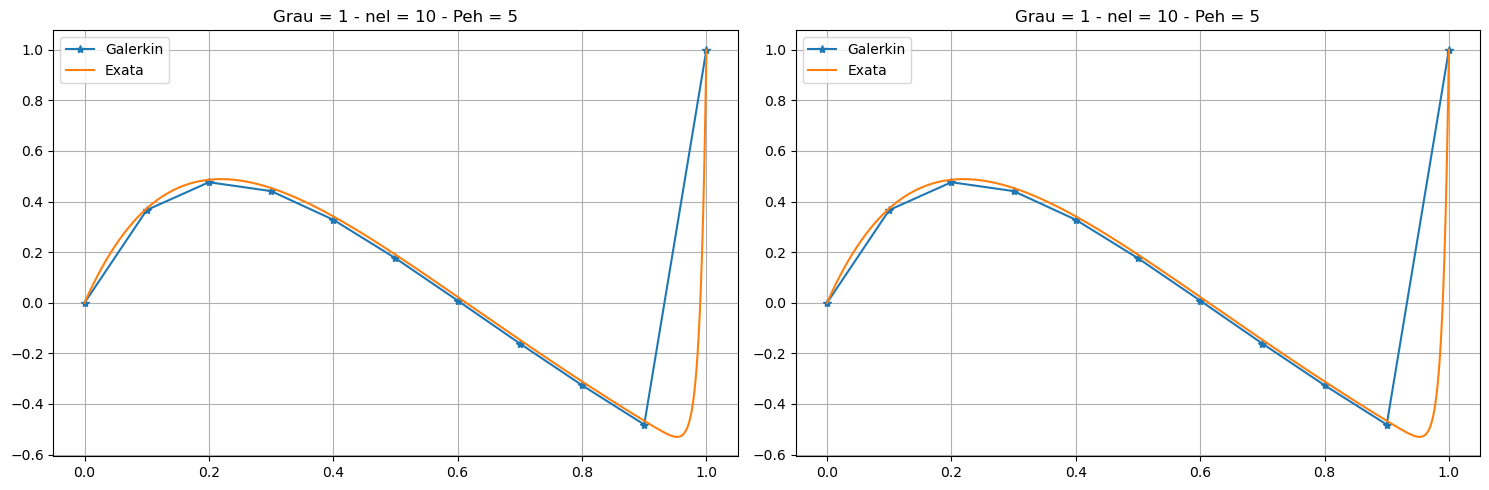

In [6]:
# Aplicando o método estável da Bolha linear, utilizando o parâmetro ótimo de beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])

for Peh_idx, nel in enumerate(n_values):

    fig, axs = plt.subplots(1, len(grau_values), figsize=(15, 5))

    for idx, grau in enumerate(grau_values):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]

        beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
        # beta = 1 - (1/Peh[Peh_idx])

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            for l in range(0, nint):

              t, w = data_n[l]
              xx = x_t(t, x[index], x[index+grau])

              for j in range(0, nen):

                  # print(shg_bolha(1, j, t, grau, beta))
                  Fe[j] += func_u(xx) * shg_bolha(1, j, t, grau, beta) * w * h/2

                  for i in range(0, nen):
                      Me[i, j] += epsilon * shg(2, i, t, grau) * shg_bolha(2, j, t, grau, beta) * w * 2/h

                      Me[i, j] += kappa * shg_bolha(1, i, t, grau, beta) * shg(2, j, t, grau) * w # * 2/h * h/2

            for k in range(0, nint):

                F_fonte[index+k] += Fe[k]

                for p in range(0, nint):
                    mat_M[index+k, index+p] += Me[k, p]

            index += grau


        mat_M[0, 0] += kappa_a
        F_fonte[0] += kappa_a*g_a - q_a

        mat_M[-1, -1] += kappa_b
        F_fonte[-1] += kappa_b*g_b - q_b

        solucao = np.linalg.solve(mat_M, F_fonte)

        # mat_Bolha[Peh_idx] = solucao

        axs[idx].plot(x, solucao, "-*")
        axs[idx].plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000)))
        axs[idx].set_title(f'Grau = {grau} - nel = {nel} - Peh = {Peh[Peh_idx]}')
        axs[idx].legend(["Galerkin", "Exata"])
        axs[idx].grid(True)

    plt.tight_layout()
    plt.show()

# A aproximação não foi nodalmente exata, uma vez que o parâmetro ótimo apresentado no material foi calculado para coeficientes e termo fonte constantes.

##Letra B

In [7]:
val_beta = np.arange(0, 1, 0.001)
erro_l2 = np.zeros(len(val_beta))
erro = np.zeros(len(val_beta))
# h_values = np.zeros((len(grau_values), len(n_values)))

for idx_0, beta in enumerate(val_beta):
  for Peh_idx, nel in enumerate(n_values):

      # fig, axs = plt.subplots(1, len(grau_values), figsize=(15, 5))

      for idx, grau in enumerate(grau_values):

          nint = grau + 1
          nen = nint

          x = np.linspace(xi, xf, nel*grau + 1)

          mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
          F_fonte = np.zeros(nel*grau + 1)

          data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

          index = 0
          h = x[grau] - x[0]

          # beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
          # beta = 1 - (1/Peh[Peh_idx])

          for n in range(0, nel):

              Me = np.zeros((nint, nint))
              Fe = np.zeros(nint)

              for l in range(0, nint):

                t, w = data_n[l]
                xx = x_t(t, x[index], x[index+grau])

                for j in range(0, nen):

                    # print(shg_bolha(1, j, t, grau, beta))
                    Fe[j] += func_u(xx) * shg_bolha(1, j, t, grau, beta) * w * h/2

                    for i in range(0, nen):
                        Me[i, j] += epsilon * shg(2, i, t, grau) * shg_bolha(2, j, t, grau, beta) * w * 2/h

                        Me[i, j] += kappa * shg_bolha(1, i, t, grau, beta) * shg(2, j, t, grau) * w # * 2/h * h/2

              for k in range(0, nint):

                  F_fonte[index+k] += Fe[k]

                  for p in range(0, nint):
                      mat_M[index+k, index+p] += Me[k, p]

              index += grau


          mat_M[0, 0] += kappa_a
          F_fonte[0] += kappa_a*g_a - q_a

          mat_M[-1, -1] += kappa_b
          F_fonte[-1] += kappa_b*g_b - q_b

          solucao = np.linalg.solve(mat_M, F_fonte)

          # mat_Bolha[Peh_idx] = solucao

          exata = u(np.linspace(xi, xf, len(solucao)))

          # erro da norma L2
          erul_2 = 0
          index = 0
          for n in range(0, nel):

              eru = 0

              for l in range(0, nint):

                  xx = 0
                  uh = 0

                  t, w = data_n[l]

                  for i in range(0, nen):
                    uh += shg(1, i, t, grau) * solucao[index + i]
                    xx += shg(1, i, t, grau) * x[index + i]

                  eru += ((u(xx) - uh)**2) * w * (h/2)

              index += grau

              erul_2+=eru

          erul_2 = np.sqrt(erul_2)
          erro_l2[idx_0] = erul_2

          ## Erro norma max
          erro[idx_0] = np.amax(np.abs(solucao - exata))

      #     axs[idx].plot(x, solucao, "-*")
      #     axs[idx].plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000)))
      #     axs[idx].set_title(f'Grau = {grau} - nel = {nel} - Peh = {Peh[Peh_idx]} - beta = {beta}')
      #     axs[idx].grid(True)

      # plt.tight_layout()
      # plt.show()

In [8]:
print(min(erro_l2))
print(min(erro))

0.2334708393962982
0.01403433526641118


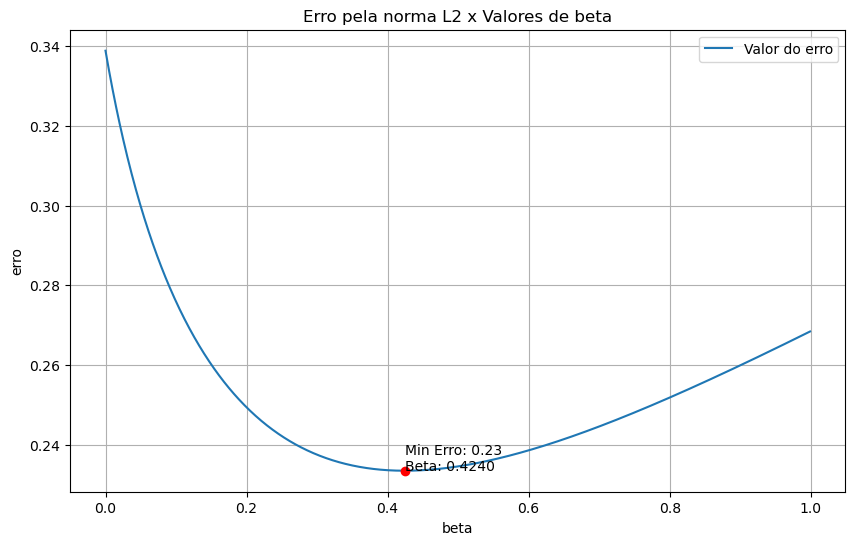

In [9]:
plt.figure(figsize=(10, 6))
plt.title("Erro pela norma L2 x Valores de beta")
plt.xlabel("beta")
plt.ylabel("erro")

plt.plot(val_beta, erro_l2)
plt.legend(["Valor do erro"])
plt.grid(True)

indice_min_erro = np.argmin(erro_l2)
beta_min_erro = val_beta[indice_min_erro]
min_erro_l2 = erro_l2[indice_min_erro]

plt.plot(val_beta[indice_min_erro], min_erro_l2, 'ro')
plt.text(val_beta[indice_min_erro], min_erro_l2, f'Min Erro: {min_erro_l2:.2f}\nBeta: {beta_min_erro:.4f}', fontsize=10)

plt.show()

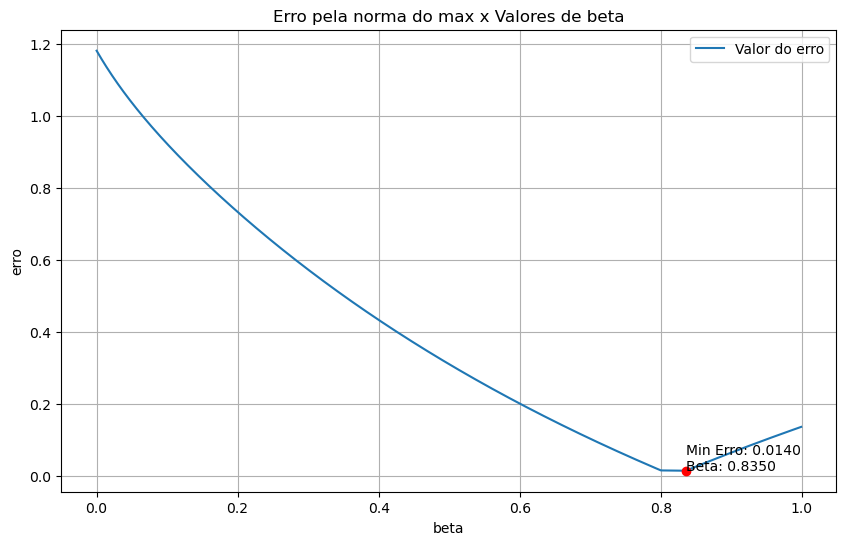

In [10]:
plt.figure(figsize=(10, 6))
plt.title("Erro pela norma do max x Valores de beta")
plt.xlabel("beta")
plt.ylabel("erro")

plt.plot(val_beta, erro)
plt.legend(["Valor do erro"])
plt.grid(True)

indice_min_erro_max = np.argmin(erro)
beta_min_erro_max = val_beta[indice_min_erro_max]
min_erro_max = erro[indice_min_erro_max]

plt.plot(val_beta[indice_min_erro_max], min_erro_max, 'ro')
plt.text(val_beta[indice_min_erro_max], min_erro_max, f'Min Erro: {min_erro_max:.4f}\nBeta: {beta_min_erro_max:.4f}', fontsize=10)

plt.show()

##Letra C

In [11]:
valores_beta = [beta_min_erro, beta_min_erro_max]
print(valores_beta)

[0.424, 0.835]


####Método Bolha

In [12]:
for Peh_idx, nel in enumerate(n_values):

    # fig, axs = plt.subplots(1, len(grau_values), figsize=(15, 5))

    for idx, grau in enumerate(grau_values):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]

        beta = valores_beta[idx]
        # beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
        # beta = 1 - (1/Peh[Peh_idx])

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            for l in range(0, nint):

              t, w = data_n[l]
              xx = x_t(t, x[index], x[index+grau])

              for j in range(0, nen):

                  # print(shg_bolha(1, j, t, grau, beta))
                  Fe[j] += func_u(xx) * shg_bolha(1, j, t, grau, beta) * w * h/2

                  for i in range(0, nen):
                      Me[i, j] += epsilon * shg(2, i, t, grau) * shg_bolha(2, j, t, grau, beta) * w * 2/h

                      Me[i, j] += kappa * shg_bolha(1, i, t, grau, beta) * shg(2, j, t, grau) * w # * 2/h * h/2

            for k in range(0, nint):

                F_fonte[index+k] += Fe[k]

                for p in range(0, nint):
                    mat_M[index+k, index+p] += Me[k, p]

            index += grau


        mat_M[0, 0] += kappa_a
        F_fonte[0] += kappa_a*g_a - q_a

        mat_M[-1, -1] += kappa_b
        F_fonte[-1] += kappa_b*g_b - q_b

        solucao = np.linalg.solve(mat_M, F_fonte)

        mat_esp[idx] = x
        mat_Bolha[idx] = solucao

    #     axs[idx].plot(x, solucao, "-*")
    #     axs[idx].plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000)))
    #     axs[idx].set_title(f'Grau = {grau} - nel = {nel} - Peh = {Peh[Peh_idx]}')
    #     axs[idx].grid(True)

    # plt.tight_layout()
    # plt.show()

####Método SUPG

In [13]:
##SUPG

## utilizando polinômios do primeiro grau a derivada segunda é anulada. Logo, a integral que a contém não foi adicionada ao código

for Peh_idx, nel in enumerate(n_values):

    # fig, axs = plt.subplots(1, len(grau_values), figsize=(15, 5))

    for idx, grau in enumerate(grau_values):

        nint = grau + 1
        nen = nint

        x = np.linspace(xi, xf, nel*grau + 1)

        mat_M = np.zeros((nel*grau + 1, nel*grau + 1))
        F_fonte = np.zeros(nel*grau + 1)

        data_n = data[grau]  # Dicionário contendo os pontos de integração e pesos

        index = 0
        h = x[grau] - x[0]

        beta = valores_beta[idx]
        # beta = (1/np.tanh(Peh[Peh_idx])) - (1/Peh[Peh_idx])
        # beta = 1 - (1/Peh[Peh_idx])

        tau = beta*h/(2*kappa)

        for n in range(0, nel):

            Me = np.zeros((nint, nint))
            Fe = np.zeros(nint)

            for l in range(0, nint):

              t, w = data_n[l]
              xx = x_t(t, x[index], x[index+grau])

              for j in range(0, nen):

                  Fe[j] += func_u(xx) * shg(1, j, t, grau) * w * h/2

                  Fe[j] += tau * kappa * func_u(xx) * shg(2, j, t, grau) * w #* h/2

                  for i in range(0, nen):
                      Me[i, j] += (epsilon + tau*kappa**2) * shg(2, i, t, grau) * shg(2, j, t, grau) * w * 2/h

                      Me[i, j] += kappa * shg(1, i, t, grau) * shg(2, j, t, grau) * w # * 2/h * h/2

            for k in range(0, nint):

                F_fonte[index+k] += Fe[k]

                for p in range(0, nint):
                    mat_M[index+k, index+p] += Me[k, p]

            index += grau


        mat_M[0, 0] += kappa_a
        F_fonte[0] += kappa_a*g_a - q_a

        mat_M[-1, -1] += kappa_b
        F_fonte[-1] += kappa_b*g_b - q_b

        solucao = np.linalg.solve(mat_M, F_fonte)

        mat_SUPG[idx] = solucao

    #     axs[idx].plot(x, solucao, "-*")
    #     axs[idx].plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000)))
    #     axs[idx].set_title(f'Grau = {grau} - nel = {nel} - Peh = {Peh[Peh_idx]}')
    #     axs[idx].grid(True)

    # plt.tight_layout()
    # plt.show()

####Método GLS

In [14]:
##GLS

## utilizando polinômios do primeiro grau a derivada segunda é anulada. Logo, a integral que a contém não foi adicionada ao código

## para funções de base lineares, o método recupera o SUPG

###Plote geral

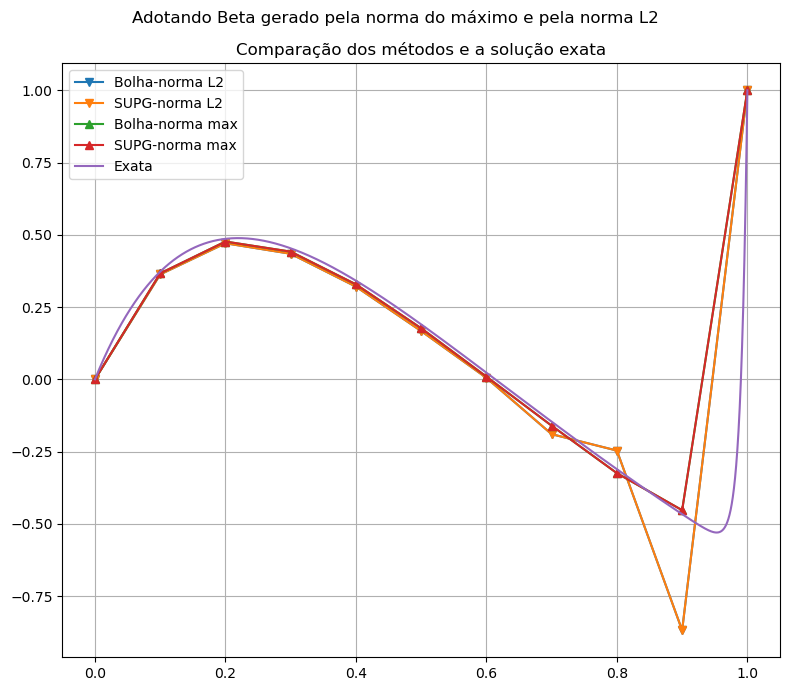

In [15]:
line_styles = ["-v", "-^", "--", "--", "-"]

plt.figure(figsize=(8, 7))

for idx, grau in enumerate(grau_values):
    plt.plot(mat_esp[idx], mat_Bolha[idx], line_styles[idx])
    plt.plot(mat_esp[idx], mat_SUPG[idx], line_styles[idx])

plt.plot(np.linspace(xi, xf, 10000), u(np.linspace(xi, xf, 10000)), linestyle="-")
plt.suptitle("Adotando Beta gerado pela norma do máximo e pela norma L2", fontsize=12)
plt.title("Comparação dos métodos e a solução exata")
plt.grid(True)
plt.legend(["Bolha-norma L2", "SUPG-norma L2", "Bolha-norma max", "SUPG-norma max", "Exata"])
plt.tight_layout()
plt.show()